# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget -c https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

--2021-11-18 09:52:52--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



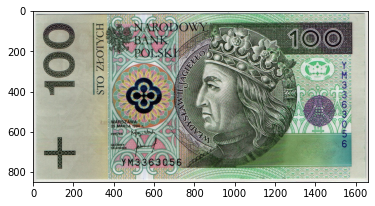

In [2]:
zloty = plt.imread("100zloty.jpg")
zloty = cv2.cvtColor(zloty, cv2.COLOR_BGR2RGB)

plt.imshow(zloty)
plt.show()

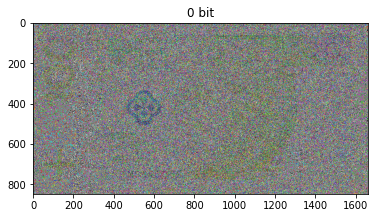

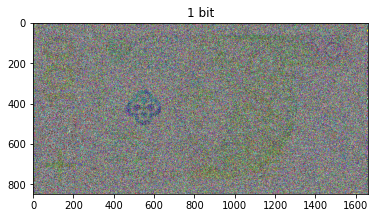

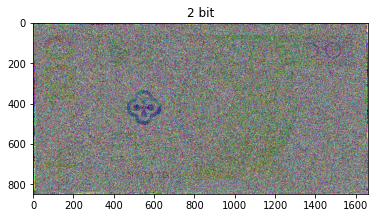

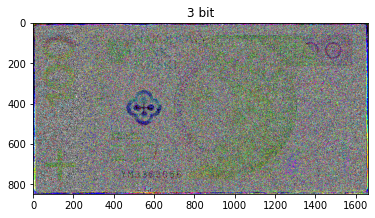

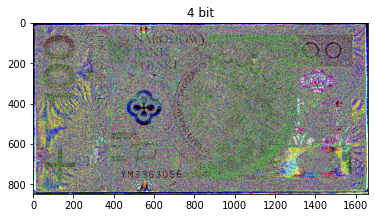

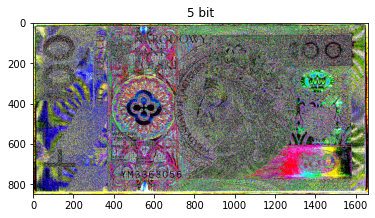

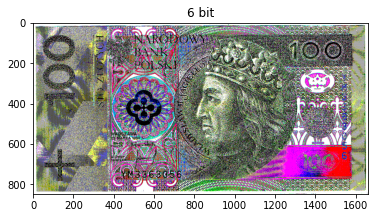

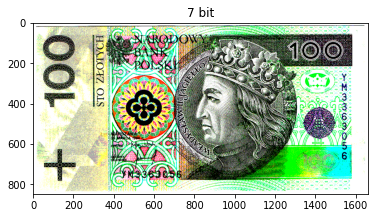

In [3]:
def get_k_bit(integer, k):
    return integer >> k & 1

bits = [None] * 8
for i in range(8):
    img = get_k_bit(zloty, i)

    bits[i] = img
    img = img * 255
    img = img.astype('uint8')

    plt.title(f"{i} bit")
    plt.imshow(img)

    plt.show()

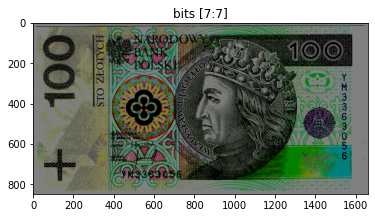

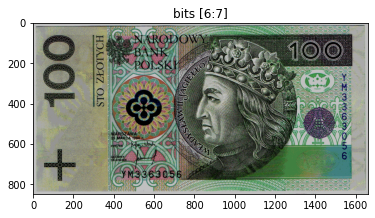

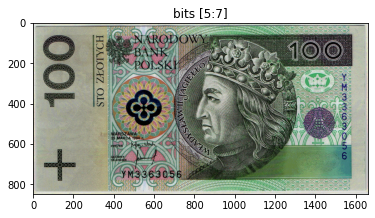

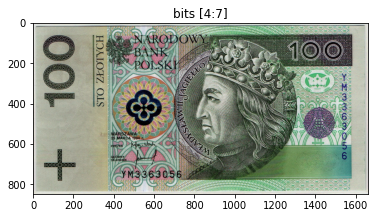

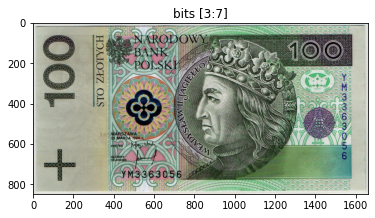

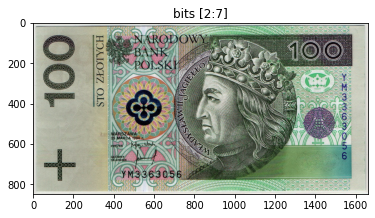

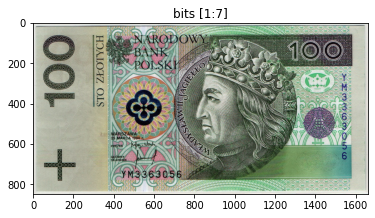

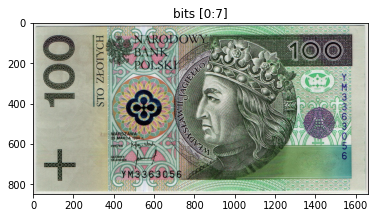

In [4]:
img = np.zeros_like(zloty)
for i in range(7, -1, -1):
    img += bits[i] << i

    plt.imshow(img)
    plt.title(f"bits [{i}:{7}]")
    plt.show()


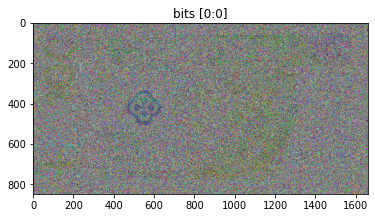

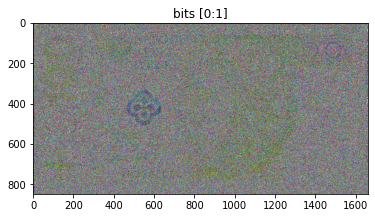

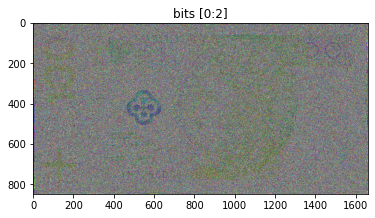

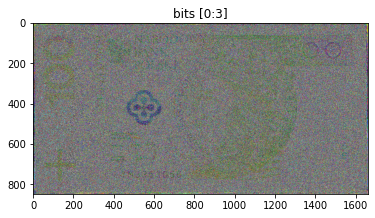

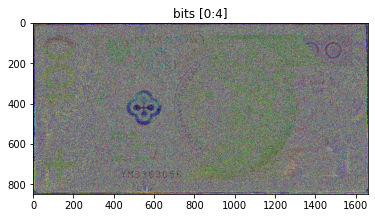

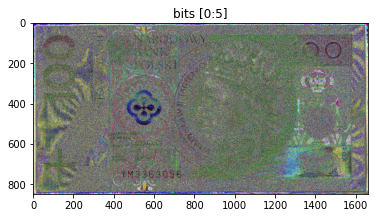

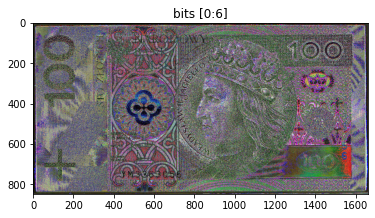

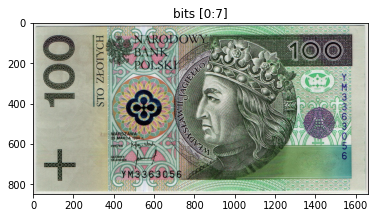

In [5]:
img = np.zeros_like(zloty)
for i in range(8):
    img += bits[i] << i

    plt.imshow(img * int(256 / 2**i - 1))
    plt.title(f"bits [{0}:{i}]")
    plt.show()